# World Happiness Report Project

# Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?


The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.
Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv


In [52]:
# importing necessory libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [53]:
# download data file in local system
data = pd.read_csv(r'C:\Assignements & HW\Internship\project1\happiness_score_dataset.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [54]:
# Check the shape of the dataset
data.shape

(158, 12)

In [55]:
# check the information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [56]:
# Let's check null values
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [57]:
# Check statstical data
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [58]:
# Check top 10 data
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [59]:
# Check the lowest top 10 data
data.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [60]:
# Check the region wise total count
data.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [61]:
# check region wise happiness score

x = data.groupby(['Region'])[['Happiness Score']].mean()

x.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Australia and New Zealand,7.285000
North America,7.273000
Western Europe,6.689619
Latin America and Caribbean,6.144682
Eastern Asia,5.626167
Middle East and Northern Africa,5.406900
Central and Eastern Europe,5.332931
Southeastern Asia,5.317444
Southern Asia,4.580857


In [62]:
y = data.loc[(data['Happiness Score'])>6]

# Counting by region
y = y.groupby(['Region'])[['Happiness Score']].count()

y.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Western Europe,16
Latin America and Caribbean,13
Middle East and Northern Africa,6
Australia and New Zealand,2
Central and Eastern Europe,2
North America,2
Southeastern Asia,2
Eastern Asia,1


In [63]:
m = data.groupby(['Region'])[['Happiness Score']].max()-data.groupby(['Region'])[['Happiness Score']].min()

m.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Middle East and Northern Africa,4.272
Southeastern Asia,2.979
Western Europe,2.730
Latin America and Caribbean,2.708
Sub-Saharan Africa,2.638
Central and Eastern Europe,2.287
Southern Asia,1.678
Eastern Asia,1.424
North America,0.308


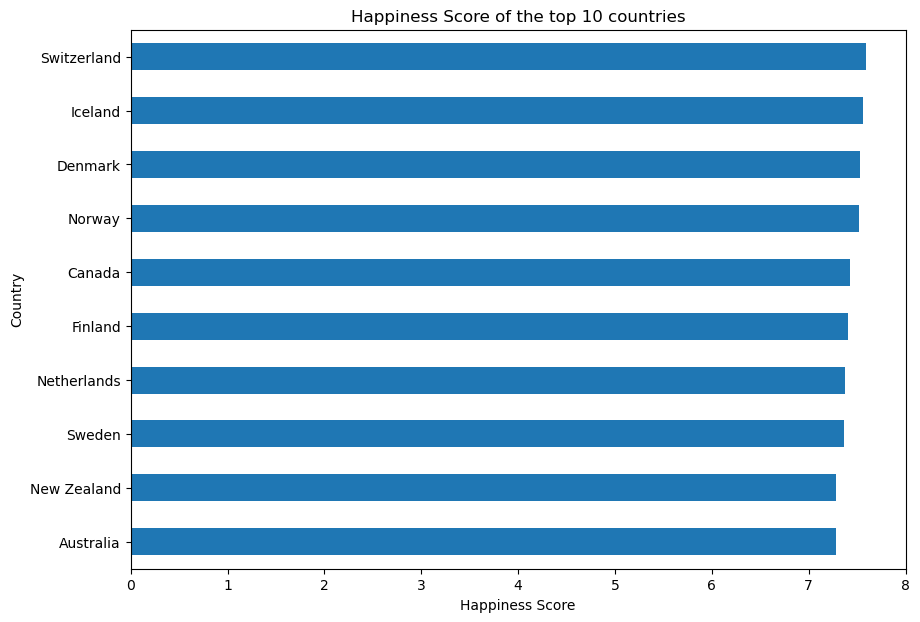

In [64]:
data1 = data.set_index('Country')
data1 = data1[0:10]['Happiness Score']

fig, ax = plt.subplots(figsize = (10,7))                               # Plot sizes
bar_plot = data1.plot.barh()                                       # Horizontal bar plot "barh"
bar_plot.set_title('Happiness Score of the top 10 countries')
bar_plot.set_xlabel('Happiness Score')
bar_plot.invert_yaxis()                                                # The biggest to smallest
plt.xlim(0,8)                                                          # change x-axis limits

plt.show()

In [65]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

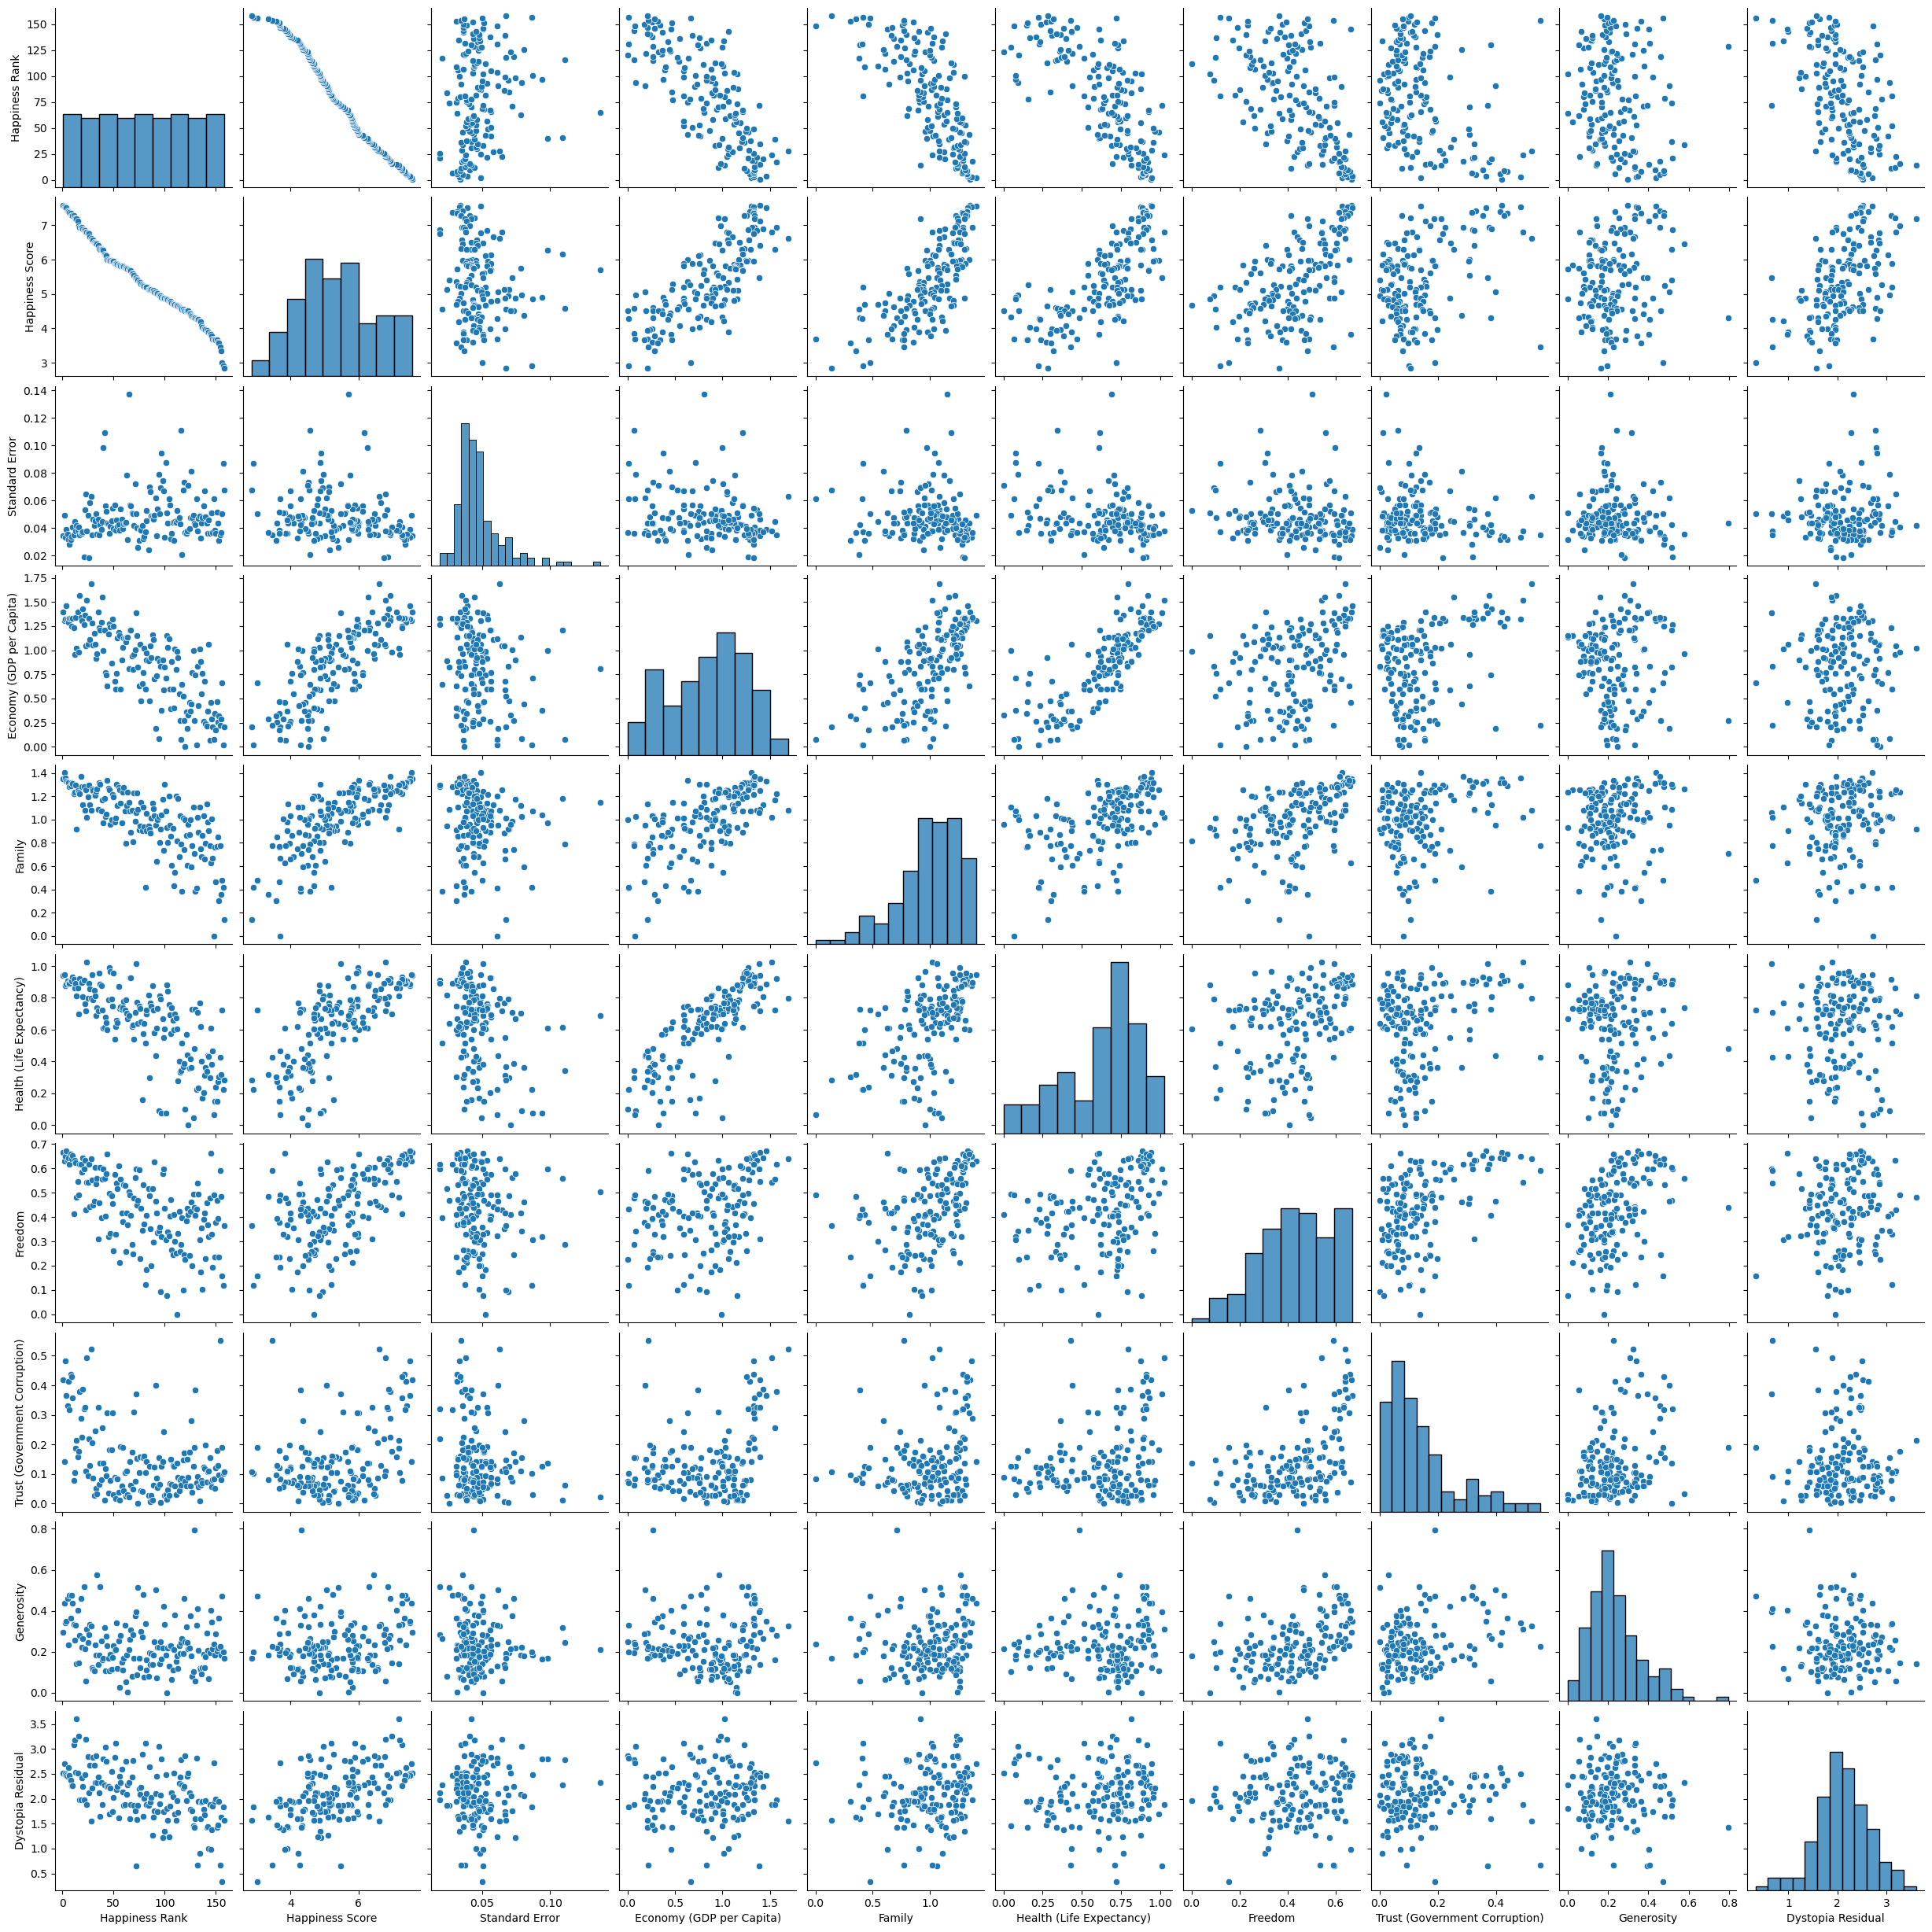

In [66]:
sns.pairplot(data)

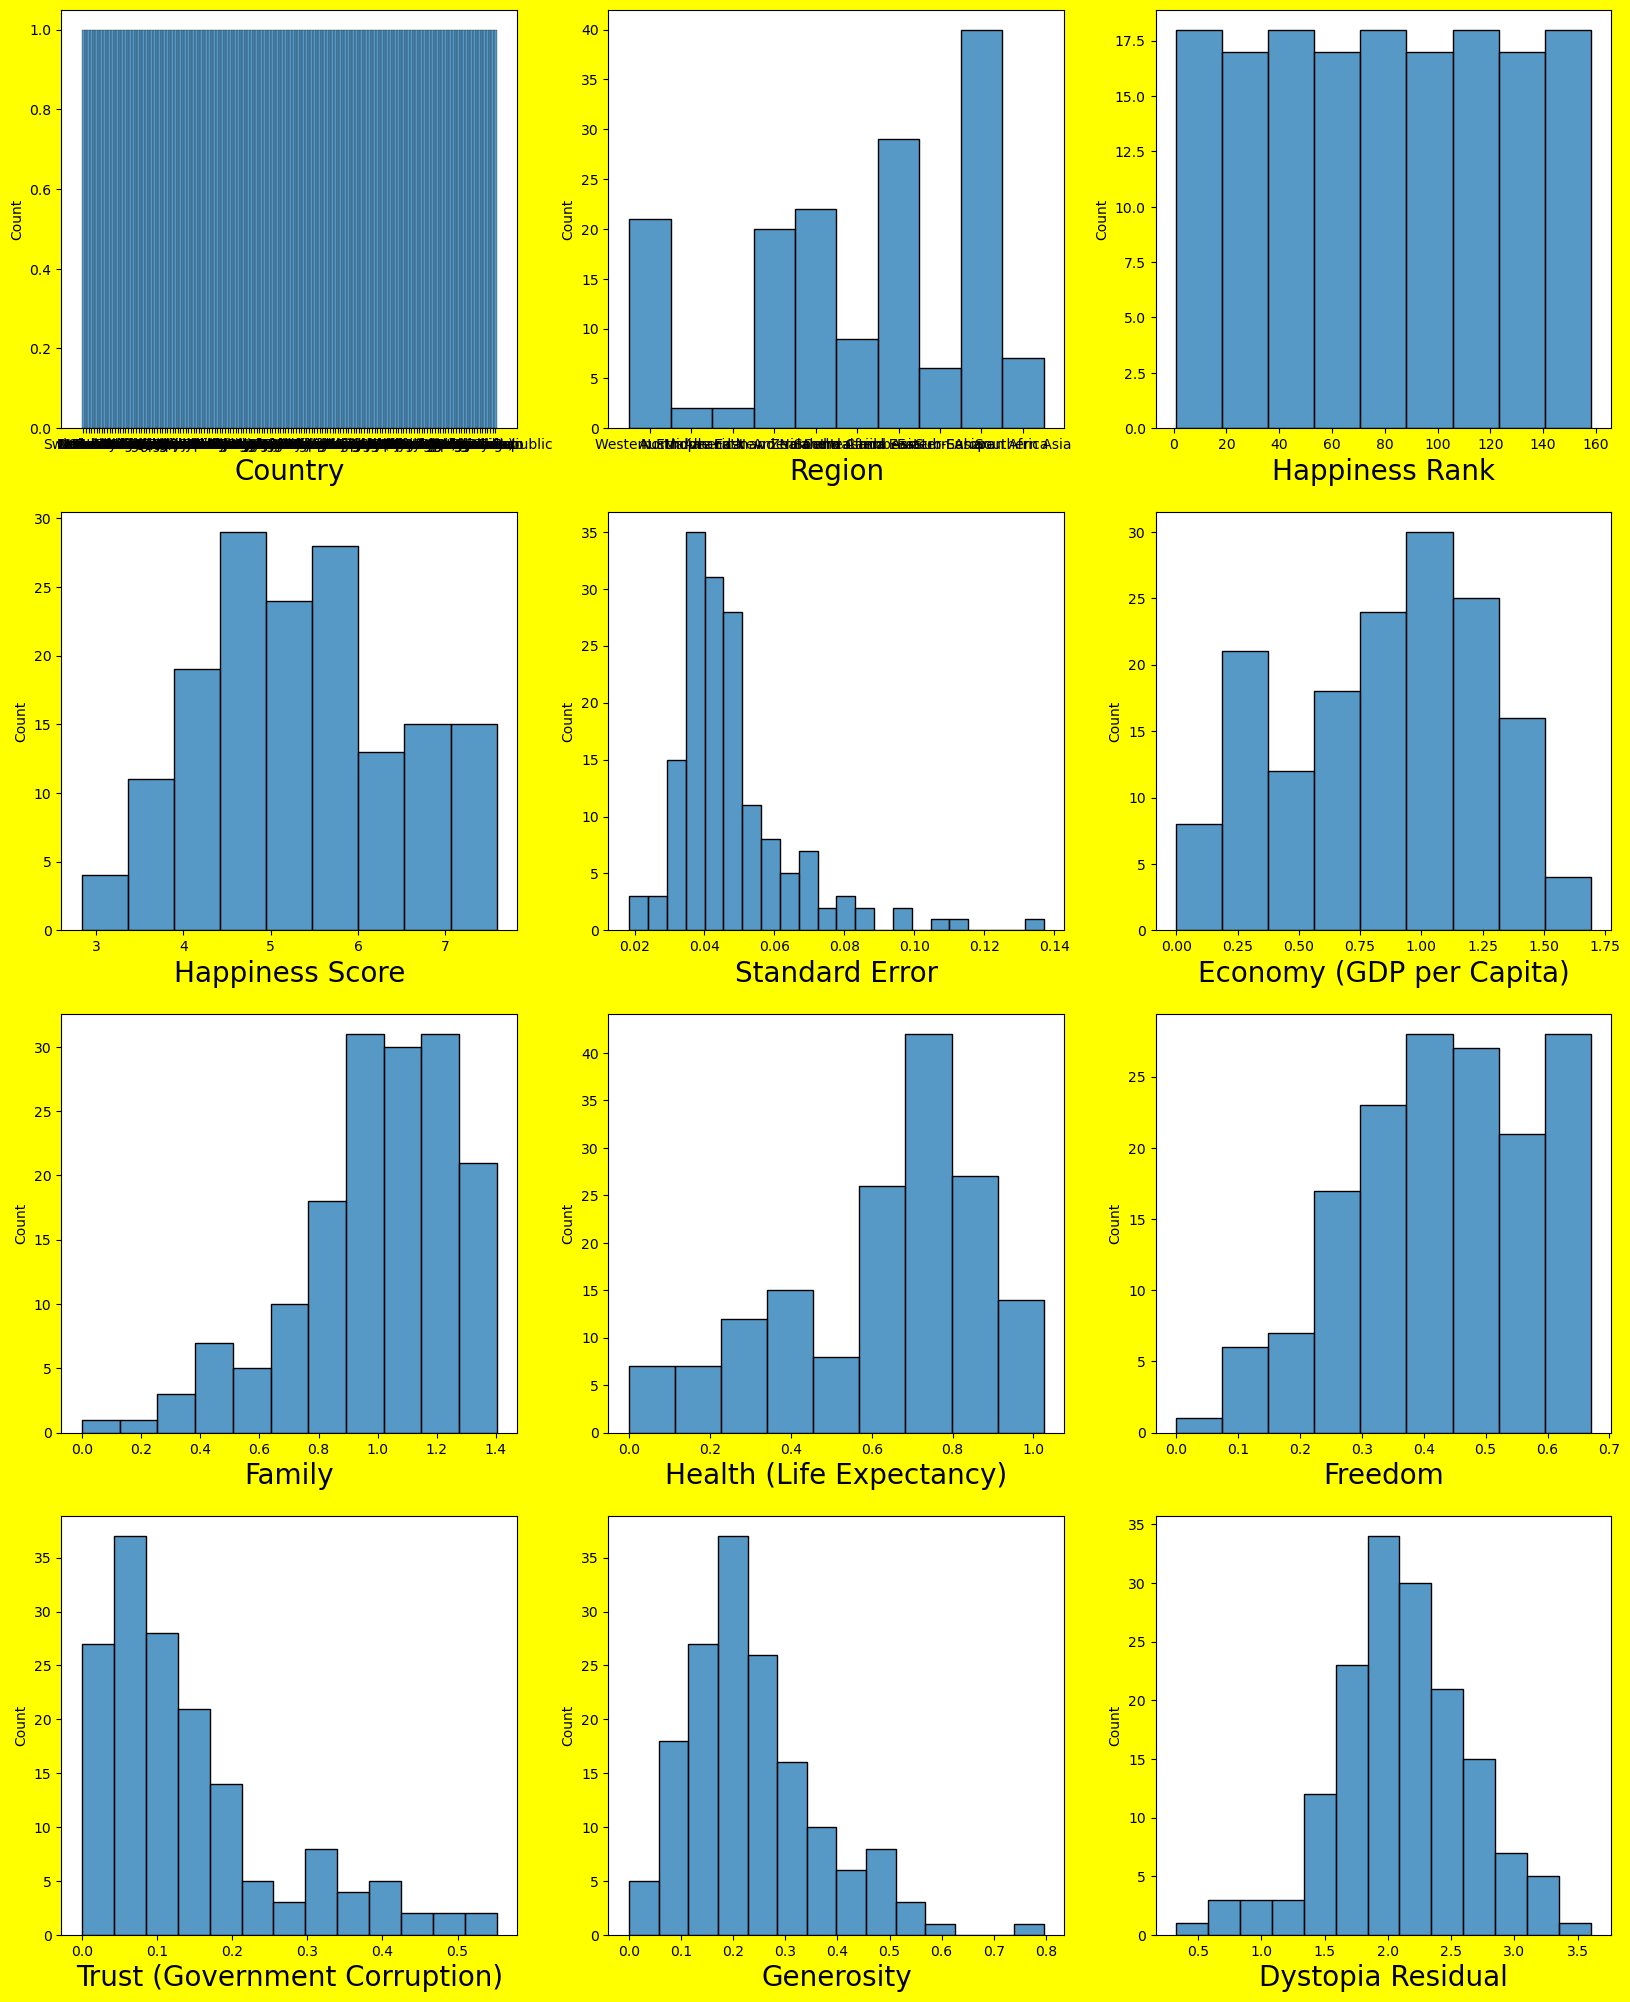

In [67]:
# Let's see how data is distributed for every column 

plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.show()

<Axes: >

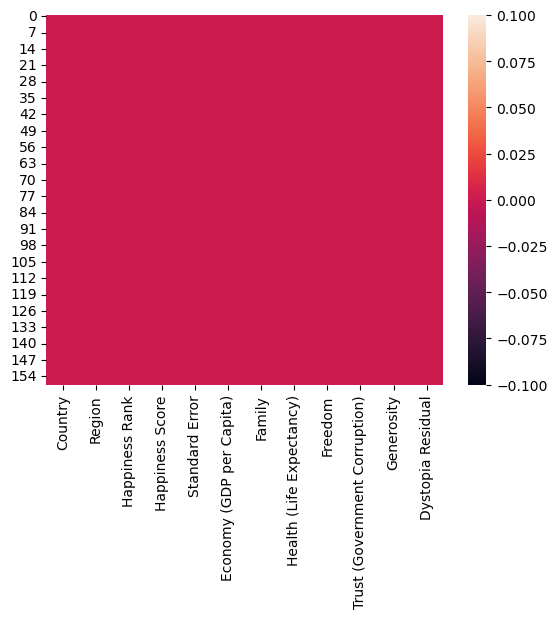

In [68]:
# Let's the visualize it using heatmap
sns.heatmap(data.isnull())

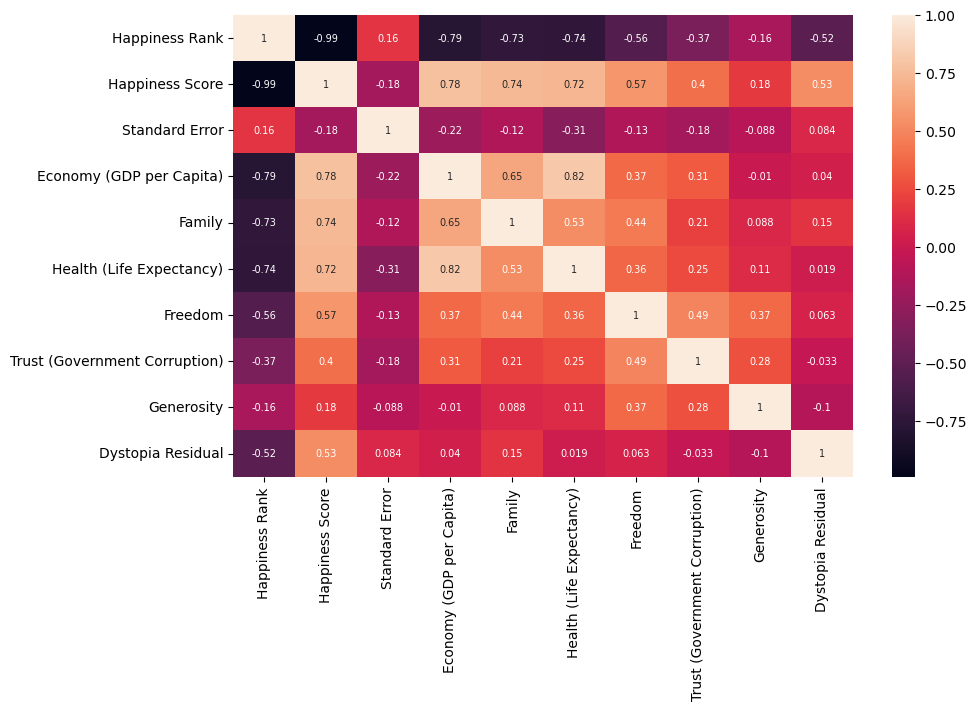

In [69]:
# Plotting Heatmap (Correlation matrix)
df_corr = data.corr() # this code will get the coefficient of one variable vs all other variable (relationship)

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':7})
plt.show()

Avobe heat map correlation we find the below points:--

1) Economy (per capita) = 78% 

2) Family = 74%

3) health = 72%

4) freedom = 57%

5) Dystopia Residual = 53%

correlated with the target variable.

In [70]:
# Let's check null values 
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [71]:
data = data.drop("Country", axis=1)

In [72]:
data = data.drop("Region", axis=1)

In [73]:
data.shape

(158, 10)

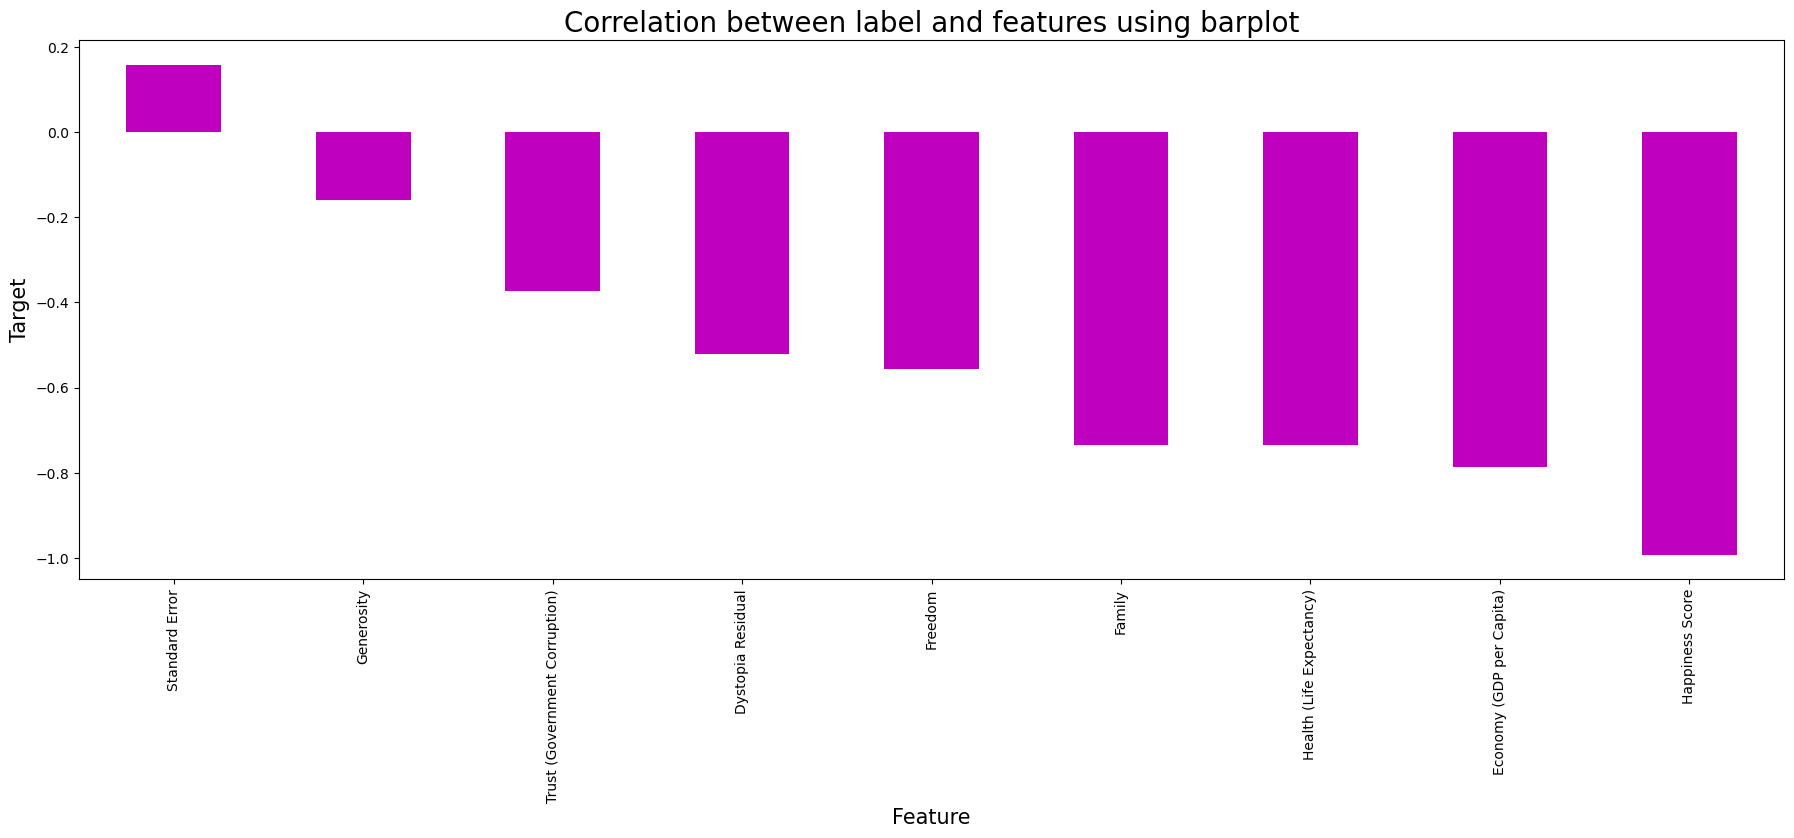

In [74]:
# Correlation between features and label using barplot
plt.figure(figsize=(22,7))
data.corr()['Happiness Rank'].sort_values(ascending=False).drop(['Happiness Rank']).plot(kind='bar', color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)
plt.show()

# separating features and label

In [75]:
x = data.drop("Happiness Rank",axis = 1)
y = data["Happiness Rank"]


# Feature scaling using standard scalarization

In [76]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,1.884792,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...
153,-1.674055,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-1.783571,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,-2.076199,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,-2.164688,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


# Creating the training and testing data sets

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Linear Regression

In [79]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [80]:
cv_lr = cross_val_score(estimator = lr, X = x, y = y, cv = 10)

y_pred_lr_train = lr.predict(x_train)
r2_score_lr_train = r2_score(y_train, y_pred_lr_train)

y_pred_lr_test = lr.predict(x_test)
r2_score_lr_test = r2_score(y_test, y_pred_lr_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_lr_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_lr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_lr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_lr_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : -1.629
R2_score (train) : 0.987
R2_score (test) : 0.983
RMSE : 6.130


In [81]:
lr.coef_, lr.intercept_

(array([-2.84998130e+03, -9.46724465e-01,  9.88137880e+02,  6.67303147e+02,
         6.03061341e+02,  3.68785360e+02,  2.94633511e+02,  3.10940837e+02,
         1.35655050e+03]),
 79.59290564157003)

Text(0, 0.5, 'Happiness Score')

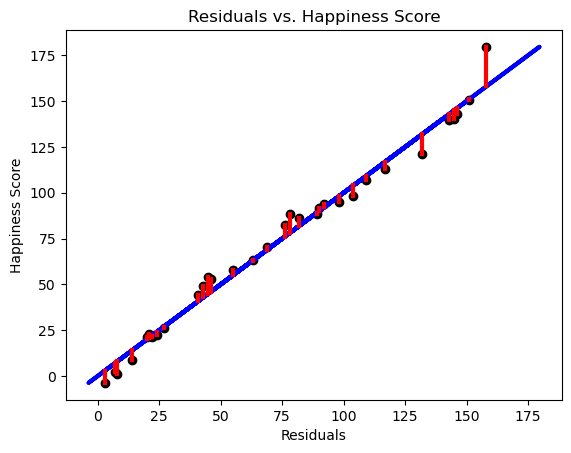

In [82]:
#  Draw the residual v/s happiness score using scatter plot 
plt.scatter(y_test,y_pred_lr_test, color='black')
plt.plot(y_pred_lr_test,y_pred_lr_test, color='blue', linewidth=3)

# draw vertical lines frome each data point to its predict value
[plt.plot([x,x],[yp,yt], color='red', linewidth=3)
         for x, yp, yt in zip(y_test, y_pred_lr_test,y_test)]

plt.title('Residuals vs. Happiness Score')
plt.xlabel('Residuals')
plt.ylabel('Happiness Score')

In [83]:
mean_squared_error(y_test, y_pred_lr_test)

37.57618821123168

# Saving the model

In [88]:
import joblib
joblib.dump(lr, "Happiness_score.pkl")

['Happiness_score.pkl']

# Predicting the saved model

In [89]:
# Let's load the saved model and get the prediction 

model = joblib.load("Happiness_score.pkl")

# Prediction 

prediction = model.predict(x_test)
prediction

array([  2.34417232,  98.20747281,  63.30753556,  52.89048842,
       121.38441536, 142.97190602, 112.91058217,  57.63315523,
        22.53820228,  91.71887504,  -3.70895726,  22.85502425,
         8.89838752,  21.128389  ,  94.07369655,  88.39596019,
       139.9943926 ,  82.27504916,  49.31685716, 139.54763483,
       107.0742631 ,  54.24835905,   1.29010795,  88.30320225,
       179.54167921,  94.92995624,  21.15765785,  86.48877087,
        26.41111768, 150.42062597,  44.49438698,  70.63572502])

In [90]:
a = np.array(y_test)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

,Predicted,Original
0,2.344172,7
1,98.207473,104
2,63.307536,63
3,52.890488,46
4,121.384415,132
5,142.971906,146
6,112.910582,117
7,57.633155,55
8,22.538202,24
9,91.718875,90
